In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X_data, Y_data = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 42)

X = torch.from_numpy(X_data.astype(np.float32))
Y = torch.from_numpy(Y_data.astype(np.float32))
Y = Y.reshape(Y.shape[0], 1)

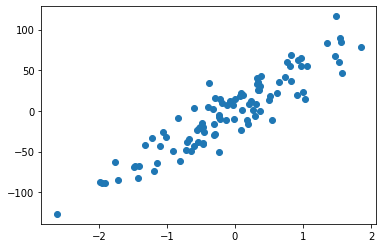

In [14]:
plt.scatter(X_data, Y_data);

In [3]:
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

In [4]:
model = nn.Linear(input_size, output_size)

In [5]:
#   Loss and optimizer
learning_rate = 1e-2
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [43]:
num_epochs = 100
for epoch in range(num_epochs):
    Y_pred = model(X)

    loss = loss_func(Y_pred, Y)
    loss.backward()

    #   Update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1}, Loss: {loss.item():.3f}")

Epoch: 10, Loss: 312.217
Epoch: 20, Loss: 312.217
Epoch: 30, Loss: 312.217
Epoch: 40, Loss: 312.217
Epoch: 50, Loss: 312.217
Epoch: 60, Loss: 312.217
Epoch: 70, Loss: 312.217
Epoch: 80, Loss: 312.217
Epoch: 90, Loss: 312.217
Epoch: 100, Loss: 312.217


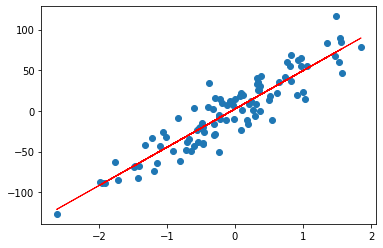

In [44]:
pred = model(X).detach().numpy()
plt.scatter(X, Y)
plt.plot(X_data, pred, c = 'r', linewidth = 1);